##CHW 02 - Ex2 - Parnian Taheri - 99106352##

In [2]:
import numpy as np
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LogisticRegression
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# from google.colab import files
# uploaded = files.upload()

In [4]:
# Load .mat file
mat_data = scipy.io.loadmat('Ex2.mat')

##A##

In [5]:
TrainData = np.array(mat_data['TrainData'])
TestData = np.array(mat_data['TestData'])

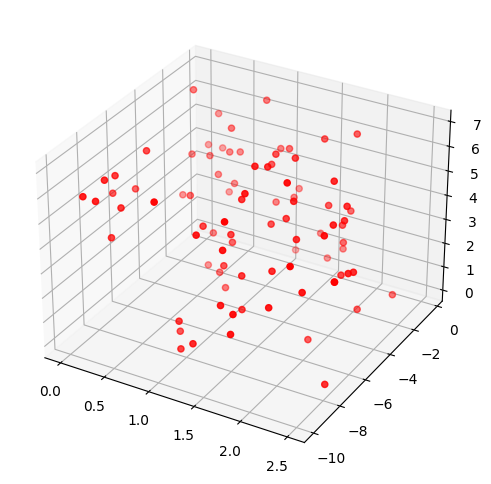

In [6]:
fig = plt.figure(figsize = (8, 6))
ax = plt.axes(projection ="3d")
scatter = ax.scatter3D(TestData[0],TestData[1],TestData[2],c='r')

# show plot
plt.show()

In [7]:
X = TrainData[0:3,:].T
y = TrainData[3,:].T
X_test = TestData.T
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

##A##

### Find the best number of units###

In [8]:
best_acc_a = 0
best_unit_a = 0
for i in range(10,20):
  print("Unit = ", i)
  # Define the model
  model = Sequential()
  model.add(Dense(units=i, input_dim=3, activation='relu'))  # Hidden layer with 4 units and ReLU activation
  model.add(Dense(units=1, activation='sigmoid'))  # Output layer with 1 unit and sigmoid activation

  # Compile the model
  model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])


  # Train the model
  model.fit(X_train, y_train, epochs=300, batch_size = 32)

  # Make predictions
  y_pred_train = model.predict(X_train)
  y_pred_val = model.predict(X_val)
  y_pred_val_binary = []
  for m in y_pred_val:
    if ( m > 0.5) :
      y_pred_val_binary.append(1)
    else :
      y_pred_val_binary.append(0)
  acc = accuracy_score(y_val, y_pred_val_binary)
  print("Validation Accuracy :", acc)

  if(acc>best_acc_a):
    best_acc_a = acc
    best_unit_a = i
    print("best_acc = ",best_acc_a, "best_unit = ", best_unit_a)

Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 5ms/step - loss: 0.3846 - accuracy: 0.8056
Epoch 220/300
3/3 [==============================] - 0s 5ms/step - loss: 0.3844 - accuracy: 0.8056
Epoch 221/300
3/3 [==============================] - 0s 7ms/step - loss: 0.3840 - accuracy: 0.8056
Epoch 222/300
3/3 [==============================] - 0s 7ms/step - loss: 0.3837 - accuracy: 0.7917
Epoch 223/300
3/3 [==============================] - 0s 6ms/step - loss: 0.3835 - accuracy: 0.7917
Epoch 224/300
3/3 [==============================] - 0s 7ms/step - loss: 0.3832 - accuracy: 0.7778
Epoch 225/300
3/3 [==============================] - 0s 6ms/step - loss: 0.3832 - accuracy: 0.7778
Epoch 226/300
3/3 [==============================] - 0s 6ms/step - loss: 0.3830 - accuracy: 0.7778
Epoch 227/300
3/3 [==============================] - 0s 6ms/step - loss: 0.3826 - accuracy: 0.7778
Epoch 228/300
3/3 [==============================] - 0s 7ms/step - loss:

In [9]:
print("best number of units in part A = ",best_unit_a)
print("best validation accuracy in part A = ",best_acc_a)

best number of units in part A =  18
best validation accuracy in part A =  0.9444444444444444


In [10]:
model = Sequential()
model.add(Dense(units = best_unit_a, input_dim=3, activation='relu'))  # Hidden layer with 4 units and ReLU activation
model.add(Dense(units=1, activation='sigmoid'))  # Output layer with 1 unit and sigmoid activation

# Compile the model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=300, batch_size=32)

y_pred_test = model.predict(X_test)
y_pred_test_binary=[]
for m in y_pred_test:
  if ( m > 0.5) :
    y_pred_test_binary.append(1)
  else :
    y_pred_test_binary.append(0)

name = {"y_test": y_pred_test_binary}
scipy.io.savemat('Testlabel_a.mat', name)

Epoch 1/300
3/3 [==============================] - 1s 9ms/step - loss: 0.9932 - accuracy: 0.4306
Epoch 2/300
3/3 [==============================] - 0s 6ms/step - loss: 0.9652 - accuracy: 0.4028
Epoch 3/300
3/3 [==============================] - 0s 5ms/step - loss: 0.9408 - accuracy: 0.3889
Epoch 4/300
3/3 [==============================] - 0s 5ms/step - loss: 0.9162 - accuracy: 0.4028
Epoch 5/300
3/3 [==============================] - 0s 10ms/step - loss: 0.8947 - accuracy: 0.4028
Epoch 6/300
3/3 [==============================] - 0s 6ms/step - loss: 0.8728 - accuracy: 0.4028
Epoch 7/300
3/3 [==============================] - 0s 9ms/step - loss: 0.8542 - accuracy: 0.4167
Epoch 8/300
3/3 [==============================] - 0s 7ms/step - loss: 0.8362 - accuracy: 0.4028
Epoch 9/300
3/3 [==============================] - 0s 6ms/step - loss: 0.8213 - accuracy: 0.3611
Epoch 10/300
3/3 [==============================] - 0s 6ms/step - loss: 0.8054 - accuracy: 0.3611
Epoch 11/300
3/3 [==========

##B##

In [11]:
best_acc_b = 0
best_unit_b = 0
for j in range(6,13):
  print("Unit = ", j)
  # Define the model
  model = Sequential()
  model.add(Dense(units=j, input_dim=3, activation='relu'))  # Hidden layer
  model.add(Dense(units=2, activation='softmax'))  # Output layer

  # Compile the model
  model.compile(optimizer='Adam', loss='', metrics=['accuracy'])

  # Train the model
  model.fit(X_train, y_train, epochs=400, batch_size=32)

  # Make predictions
  y_pred_train = model.predict(X_train)
  y_pred_val = model.predict(X_val)

  y_pred_val_binary = []
  for i in y_pred_val:
    if ( i[0] > i[1]) :
      y_pred_val_binary.append(0)
    else :
      y_pred_val_binary.append(1)

  acc = accuracy_score(y_val, y_pred_val_binary)
  print("Validation Accuracy :", acc)

  if(acc>best_acc_b):
    best_acc_b = acc
    best_unit_b = j
    print("best_acc = ",best_acc_b, "best_unit = ", best_unit_b)


Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 6ms/step - loss: 0.4701 - accuracy: 0.7083
Epoch 316/400
3/3 [==============================] - 0s 5ms/step - loss: 0.4701 - accuracy: 0.7083
Epoch 317/400
3/3 [==============================] - 0s 5ms/step - loss: 0.4698 - accuracy: 0.7083
Epoch 318/400
3/3 [==============================] - 0s 5ms/step - loss: 0.4695 - accuracy: 0.7083
Epoch 319/400
3/3 [==============================] - 0s 5ms/step - loss: 0.4692 - accuracy: 0.7222
Epoch 320/400
3/3 [==============================] - 0s 6ms/step - loss: 0.4691 - accuracy: 0.7222
Epoch 321/400
3/3 [==============================] - 0s 6ms/step - loss: 0.4687 - accuracy: 0.7361
Epoch 322/400
3/3 [==============================] - 0s 5ms/step - loss: 0.4684 - accuracy: 0.7361
Epoch 323/400
3/3 [==============================] - 0s 6ms/step - loss: 0.4683 - accuracy: 0.7361
Epoch 324/400
3/3 [==============================] - 0s 5ms/step - loss:

In [18]:
print("best number of units in part B = ",best_unit_b)
print("best validation accuracy in part B = ",best_acc_b)

best number of units in part B =  7
best validation accuracy in part B =  0.9444444444444444


In [15]:
model = Sequential()
model.add(Dense(units = best_unit_b, input_dim=3, activation='relu'))  # Hidden layer
model.add(Dense(units = 2, activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=400, batch_size=32)
y_pred_test = model.predict(X_test)

y_pred_test_binary = []
for i in y_pred_val:
  if ( i[0] > i[1]) :
    y_pred_val_binary.append(0)
  else :
    y_pred_val_binary.append(1)


name = {"y_test": y_pred_test_binary}
scipy.io.savemat('Testlabel_b.mat', name)

Epoch 1/400
3/3 [==============================] - 1s 7ms/step - loss: 2.7665 - accuracy: 0.4583
Epoch 2/400
3/3 [==============================] - 0s 6ms/step - loss: 2.6940 - accuracy: 0.4583
Epoch 3/400
3/3 [==============================] - 0s 6ms/step - loss: 2.6212 - accuracy: 0.4583
Epoch 4/400
3/3 [==============================] - 0s 5ms/step - loss: 2.5517 - accuracy: 0.4583
Epoch 5/400
3/3 [==============================] - 0s 5ms/step - loss: 2.4751 - accuracy: 0.4583
Epoch 6/400
3/3 [==============================] - 0s 5ms/step - loss: 2.4095 - accuracy: 0.4583
Epoch 7/400
3/3 [==============================] - 0s 5ms/step - loss: 2.3408 - accuracy: 0.4583
Epoch 8/400
3/3 [==============================] - 0s 5ms/step - loss: 2.2743 - accuracy: 0.4583
Epoch 9/400
3/3 [==============================] - 0s 5ms/step - loss: 2.2078 - accuracy: 0.4583
Epoch 10/400
3/3 [==============================] - 0s 5ms/step - loss: 2.1449 - accuracy: 0.4583
Epoch 11/400
3/3 [===========